<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [2]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [3]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [4]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


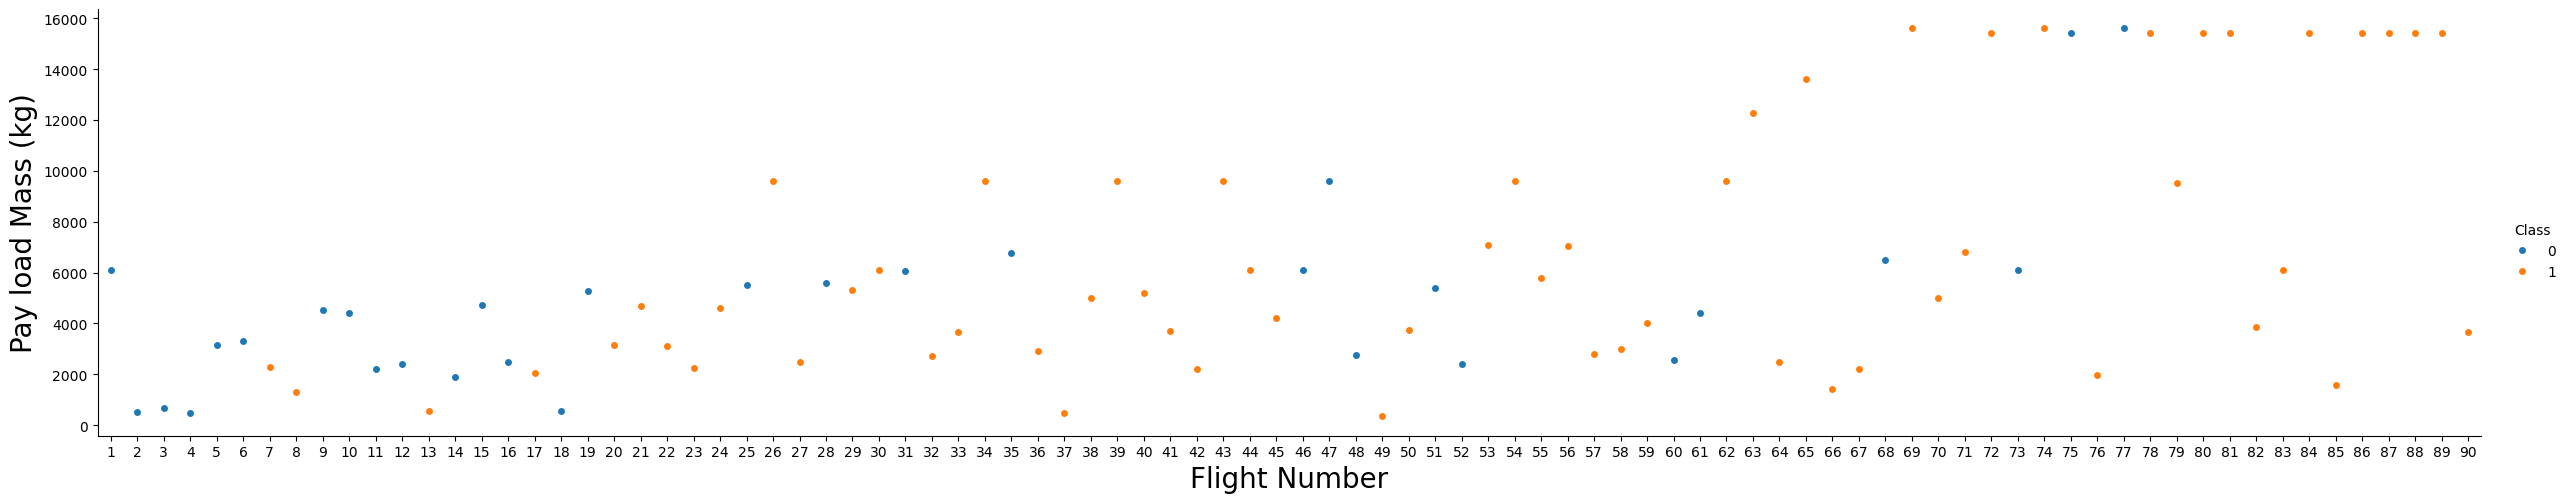

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


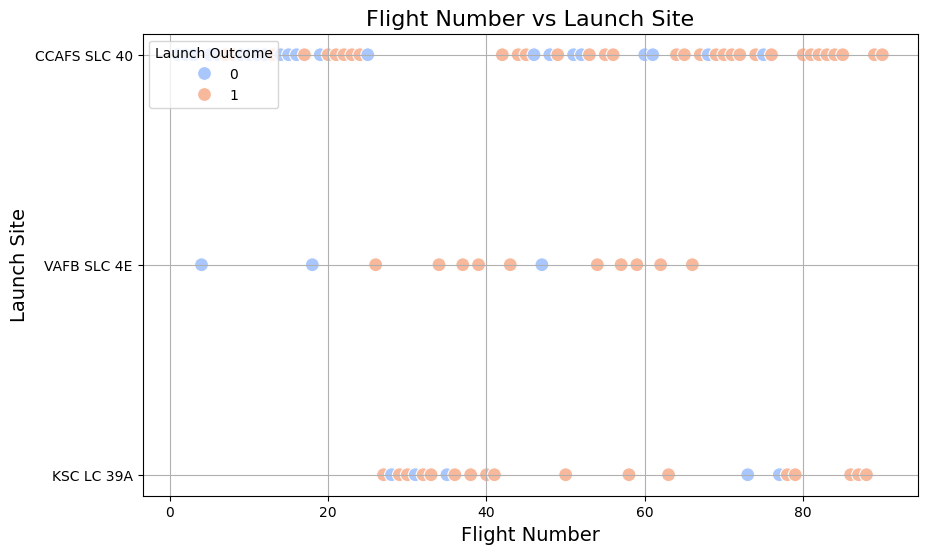

In [6]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
plt.figure(figsize=(10, 6))
sns.scatterplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, palette="coolwarm", s=100)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Flight Number vs Launch Site", fontsize=16)
plt.legend(title="Launch Outcome", loc='upper left')
plt.grid(True)
plt.show()

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


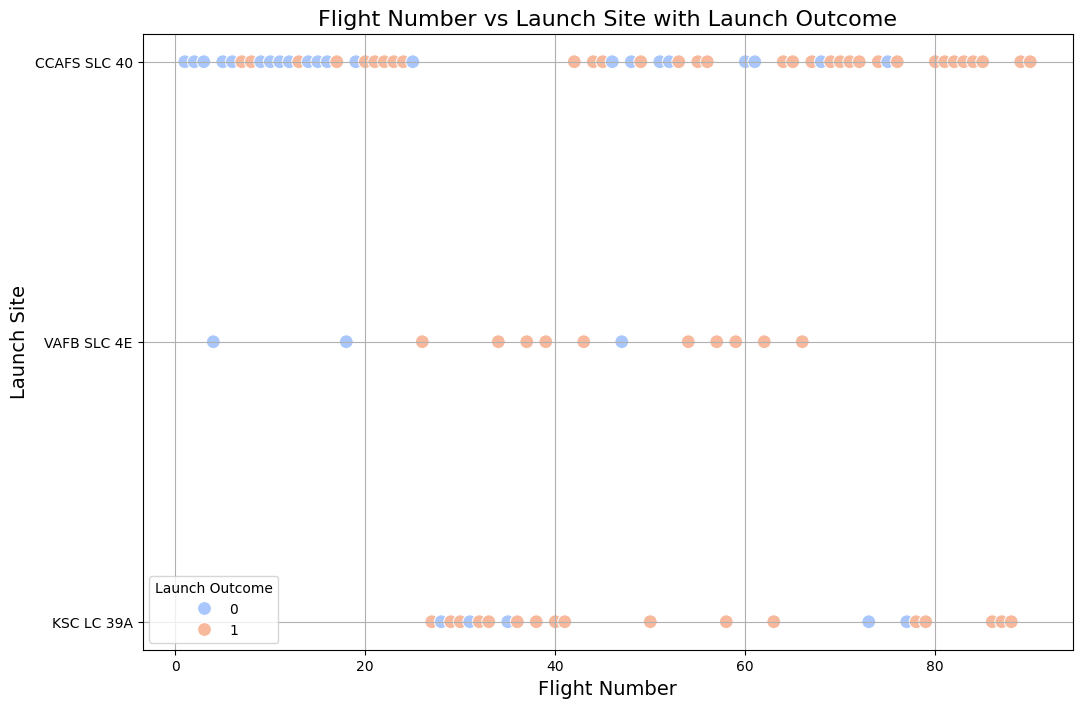

In [7]:
# Plotting the scatter point chart
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class', palette='coolwarm', s=100)
plt.title('Flight Number vs Launch Site with Launch Outcome', fontsize=16)
plt.xlabel('Flight Number', fontsize=14)
plt.ylabel('Launch Site', fontsize=14)
plt.legend(title='Launch Outcome', loc='best')
plt.grid(True)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


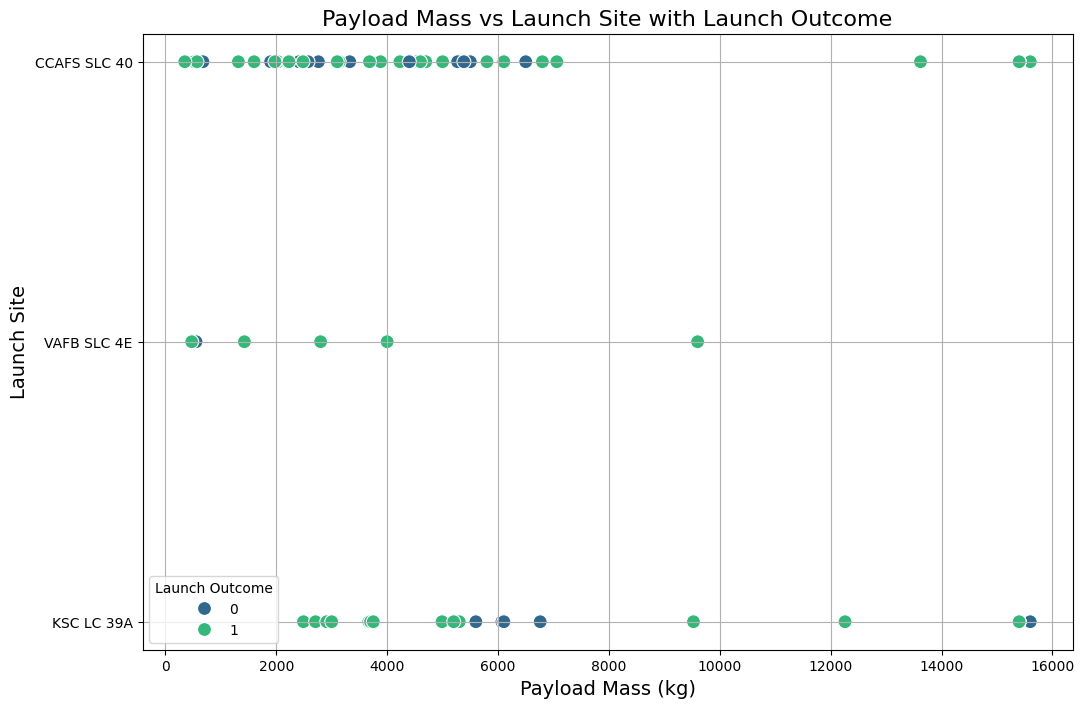

In [8]:
### TASK 2: Visualize the relationship between Payload and Launch Site
# Plotting the scatter point chart
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class', palette='viridis', s=100)
plt.title('Payload Mass vs Launch Site with Launch Outcome', fontsize=16)
plt.xlabel('Payload Mass (kg)', fontsize=14)
plt.ylabel('Launch Site', fontsize=14)
plt.legend(title='Launch Outcome', loc='best')
plt.grid(True)
plt.show()

We also want to observe if there is any relationship between launch sites and their payload mass.


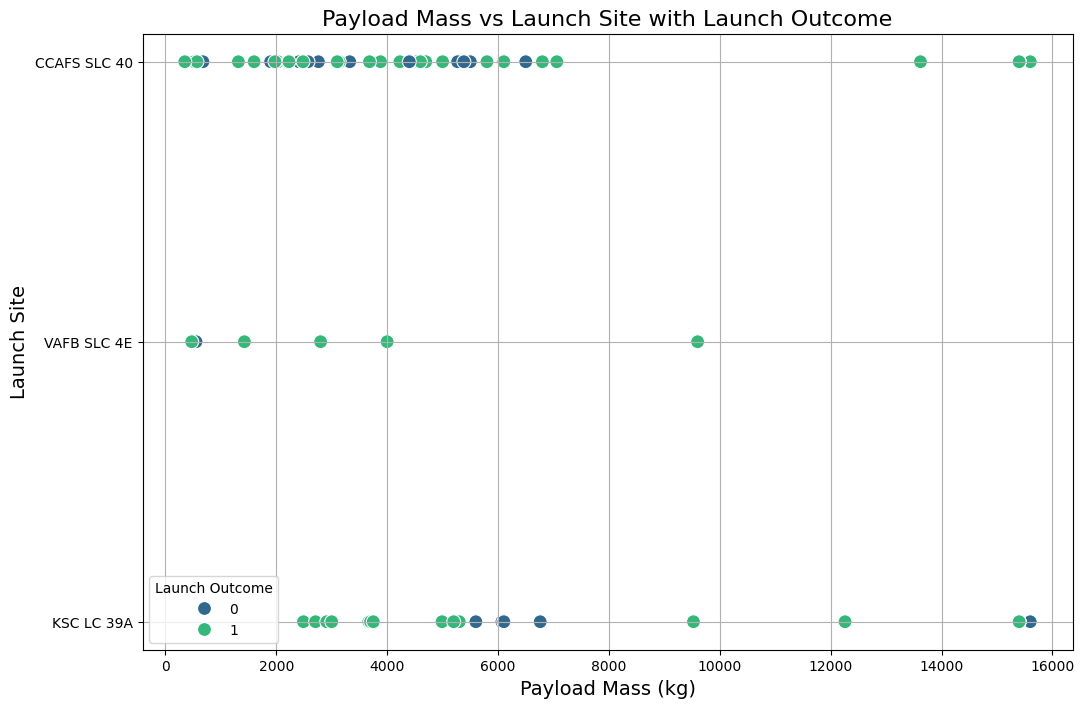

In [9]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
# Plotting the scatter point chart
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class', palette='viridis', s=100)
plt.title('Payload Mass vs Launch Site with Launch Outcome', fontsize=16)
plt.xlabel('Payload Mass (kg)', fontsize=14)
plt.ylabel('Launch Site', fontsize=14)
plt.legend(title='Launch Outcome', loc='best')
plt.grid(True)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


<ipython-input-13-b3d20a1c3257>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orbit_success, x='Orbit', y='Success Rate', palette='viridis')


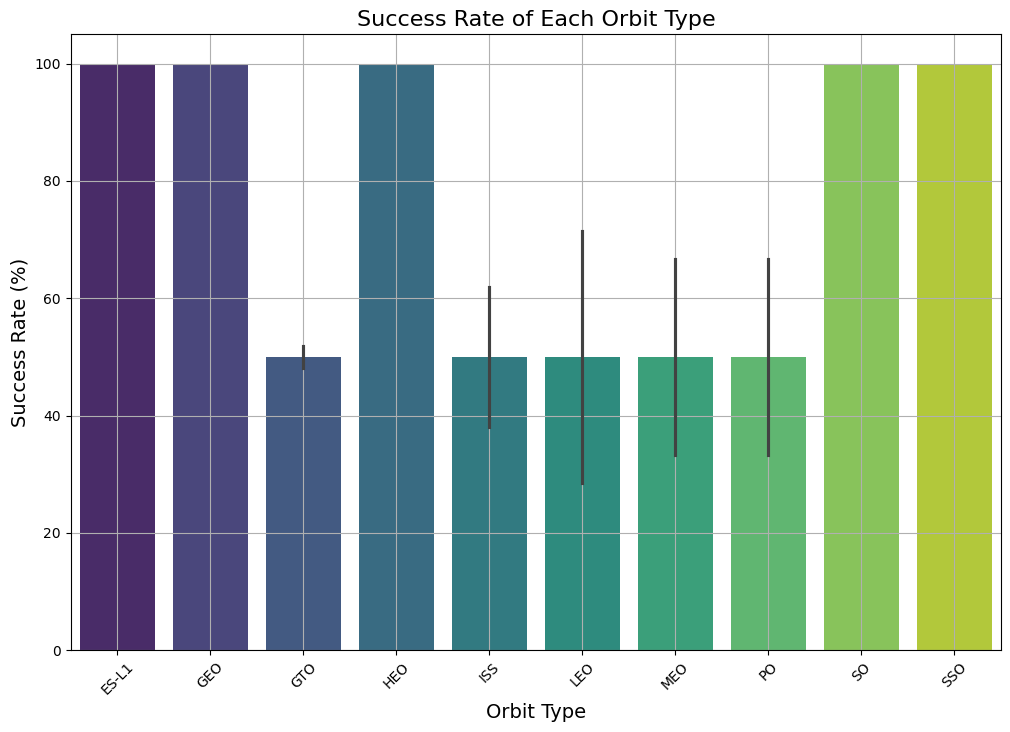

In [13]:
### TASK  3: Visualize the relationship between success rate of each orbit type
orbit_success = df.groupby('Orbit')['Class'].value_counts(normalize=True).loc[:'Success'] * 100
orbit_success = orbit_success.reset_index(name='Success Rate')

# Plotting the success rates
plt.figure(figsize=(12, 8))
sns.barplot(data=orbit_success, x='Orbit', y='Success Rate', palette='viridis')
plt.title('Success Rate of Each Orbit Type', fontsize=16)
plt.xlabel('Orbit Type', fontsize=14)
plt.ylabel('Success Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


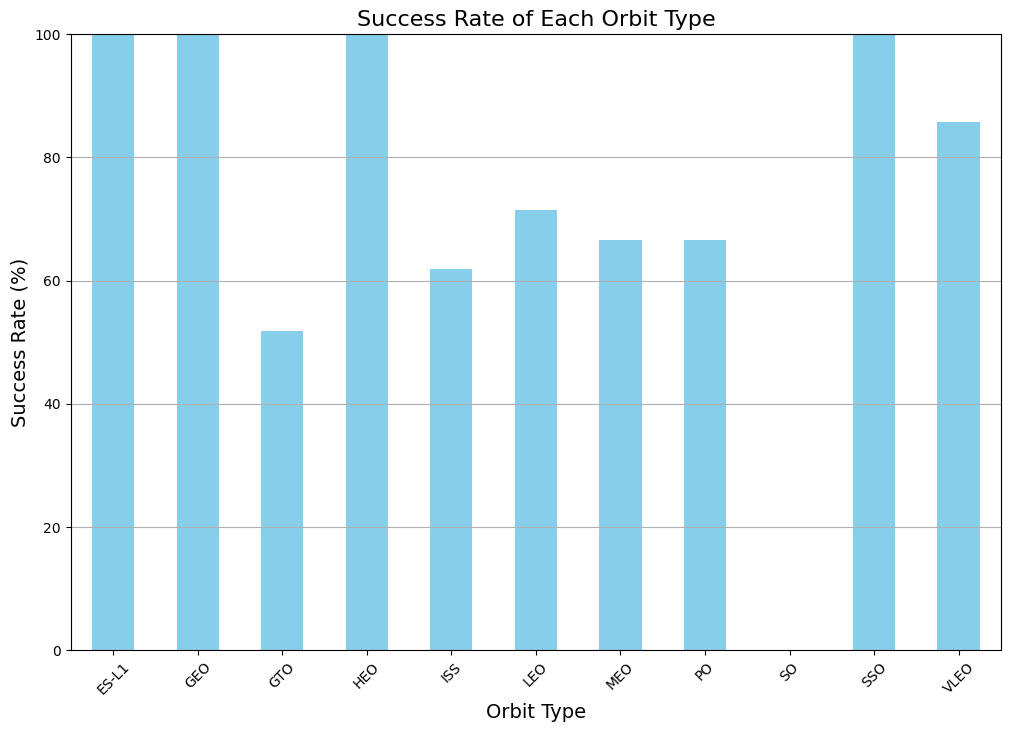

In [14]:
# HINT use groupby method on Orbit column and get the mean of Class column
# Calculate success rate for each orbit type
orbit_success_rate = df.groupby('Orbit')['Class'].mean() * 100

# Plotting the bar chart
plt.figure(figsize=(12, 8))
orbit_success_rate.plot(kind='bar', color='skyblue')
plt.title('Success Rate of Each Orbit Type', fontsize=16)
plt.xlabel('Orbit Type', fontsize=14)
plt.ylabel('Success Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Ensure y-axis starts from 0 and ends at 100
plt.grid(axis='y')
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


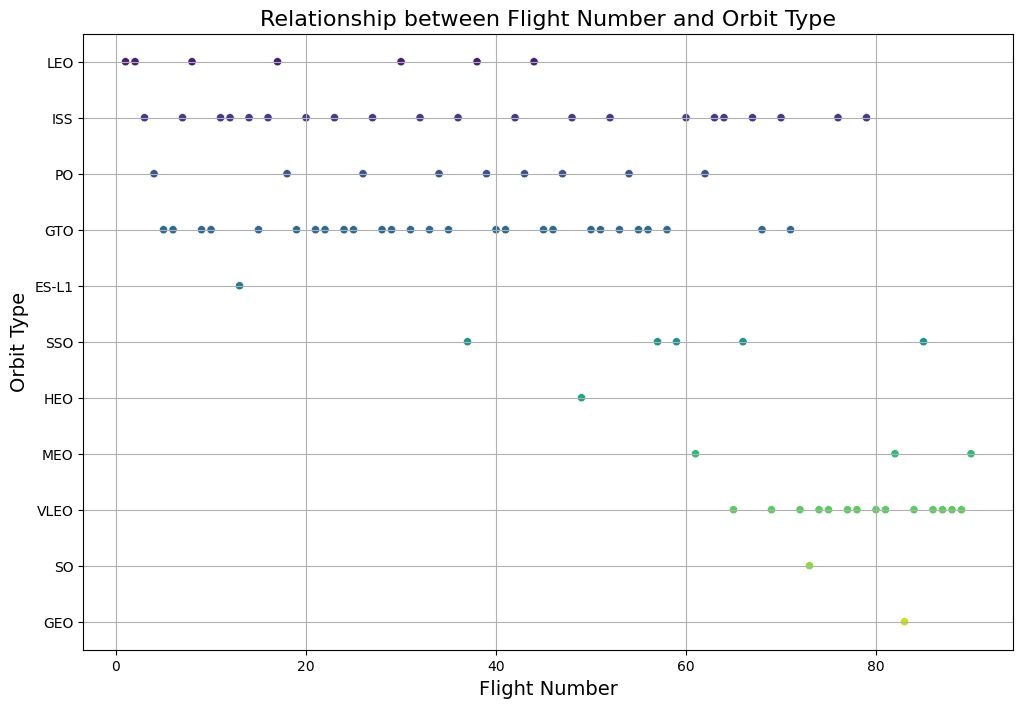

In [15]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
# Plotting the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Orbit', palette='viridis', legend=False)
plt.title('Relationship between Flight Number and Orbit Type', fontsize=16)
plt.xlabel('Flight Number', fontsize=14)
plt.ylabel('Orbit Type', fontsize=14)
plt.grid(True)
plt.show()

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


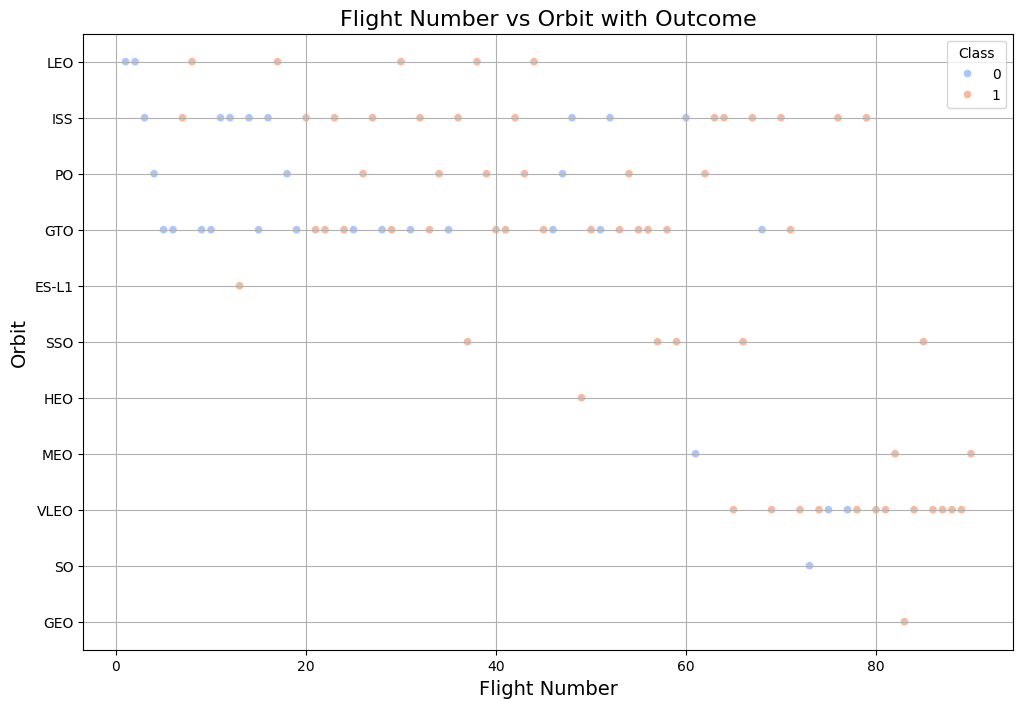

In [16]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
# Plotting the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class', palette='coolwarm')
plt.title('Flight Number vs Orbit with Outcome', fontsize=16)
plt.xlabel('Flight Number', fontsize=14)
plt.ylabel('Orbit', fontsize=14)
plt.grid(True)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


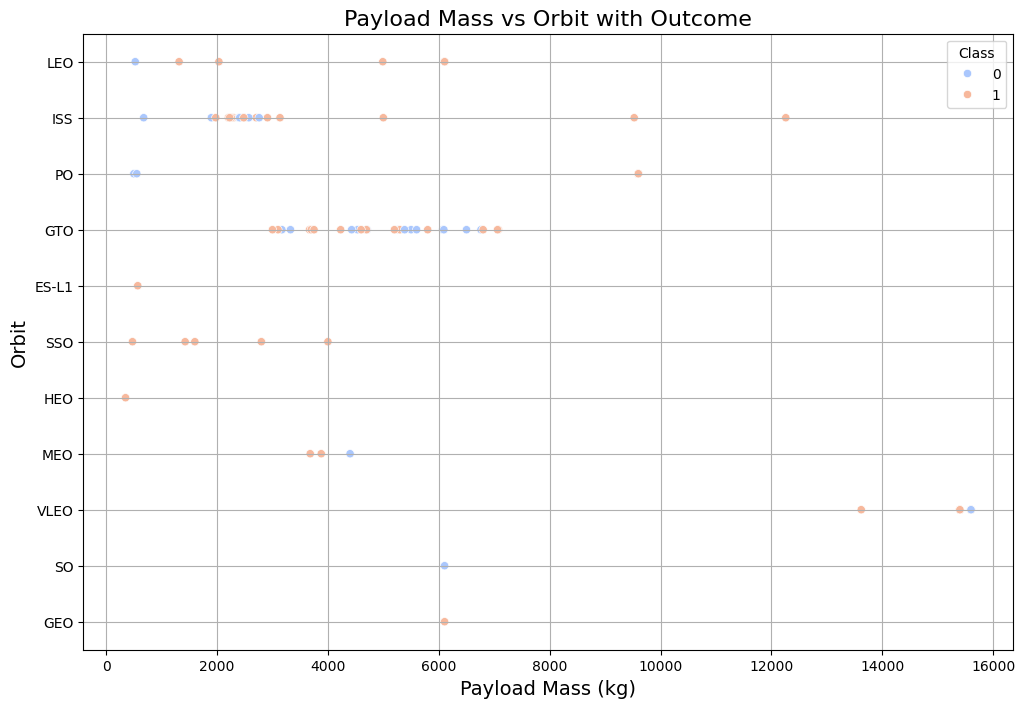

In [17]:
# Plotting the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class', palette='coolwarm')
plt.title('Payload Mass vs Orbit with Outcome', fontsize=16)
plt.xlabel('Payload Mass (kg)', fontsize=14)
plt.ylabel('Orbit', fontsize=14)
plt.grid(True)
plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


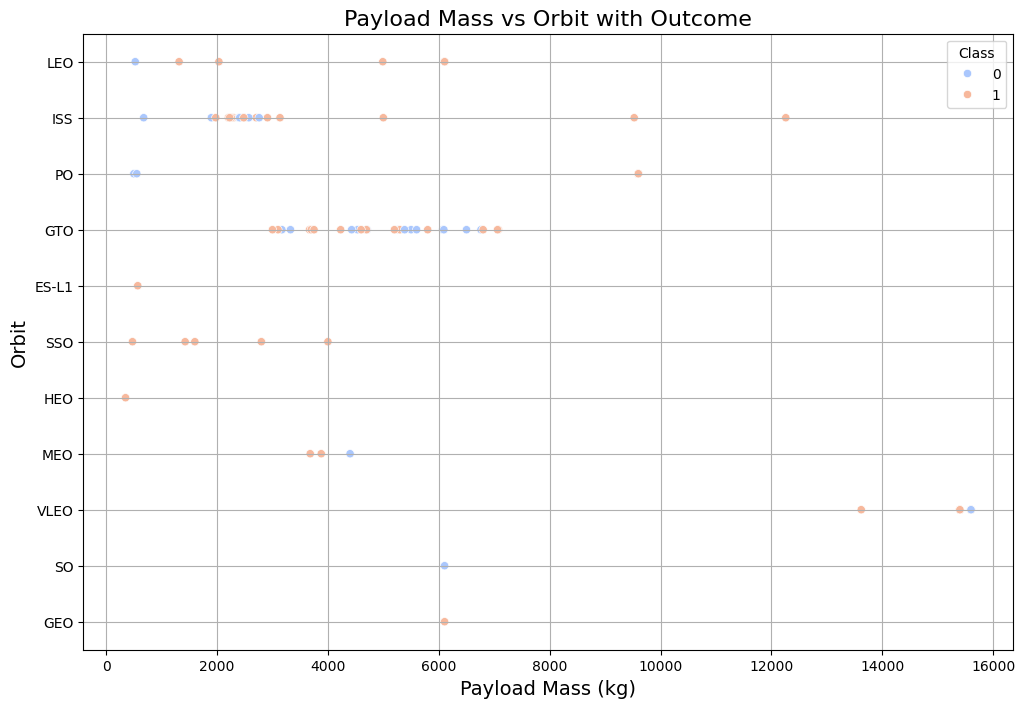

In [18]:

# Plotting the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class', palette='coolwarm')
plt.title('Payload Mass vs Orbit with Outcome', fontsize=16)
plt.xlabel('Payload Mass (kg)', fontsize=14)
plt.ylabel('Orbit', fontsize=14)
plt.grid(True)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


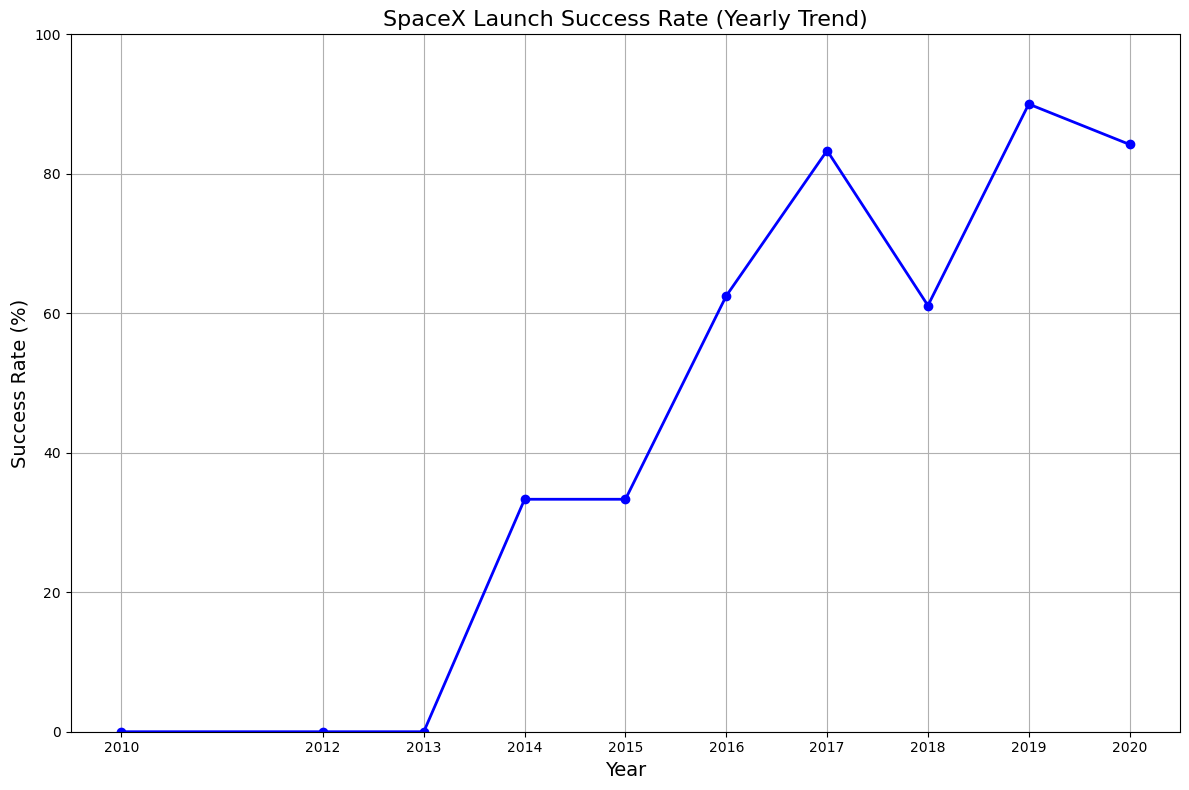

In [21]:
### TASK  6: Visualize the launch success yearly trend
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from Date column
df['Year'] = df['Date'].dt.year

# Calculate success rate by year
yearly_success_rate = df.groupby('Year')['Class'].mean() * 100

# Plotting the trend
plt.figure(figsize=(12, 8))
yearly_success_rate.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)
plt.title('SpaceX Launch Success Rate (Yearly Trend)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Success Rate (%)', fontsize=14)
plt.xticks(yearly_success_rate.index)
plt.grid(True)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [26]:
import pandas as pd

# Assuming df is already defined and contains a 'Date' column in datetime format

# Function to extract year from datetime object
def extract_year(date_obj):
    return date_obj.year

# Apply the function to each element in the 'Date' column
df['Year'] = df['Date'].apply(extract_year)

# Display the updated DataFrame with 'Year' column
print(df.head())


   FlightNumber       Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1 2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2 2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3 2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4 2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5 2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  Year  
0            0  B0003  -80.577366  28.561857      

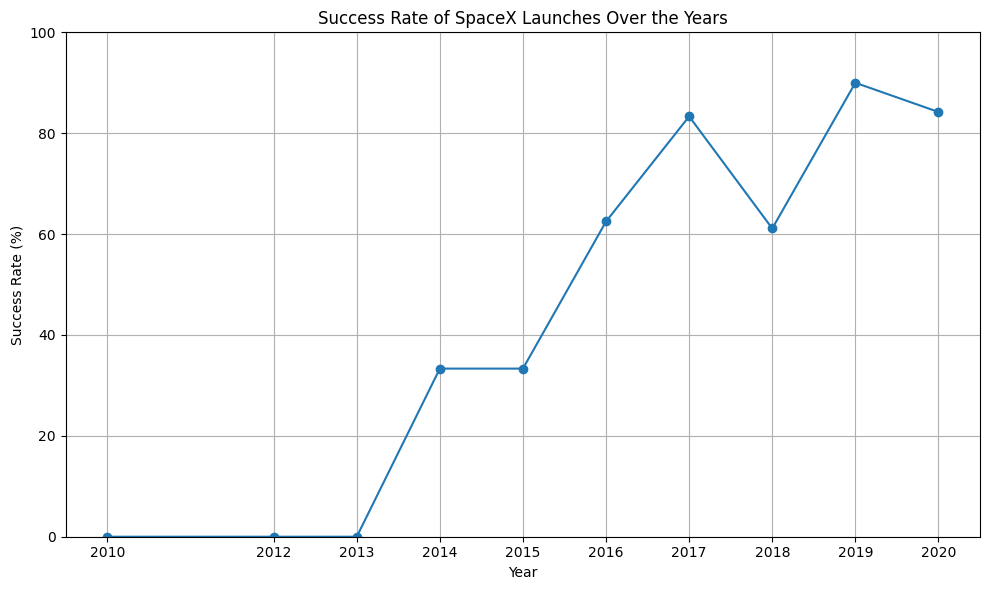

In [27]:
# Calculate success rate per year
success_rate = df.groupby('Year')['Class'].mean() * 100  # Multiply by 100 to get percentage

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(success_rate.index, success_rate.values, marker='o', linestyle='-')
plt.title('Success Rate of SpaceX Launches Over the Years')
plt.xlabel('Year')
plt.ylabel('Success Rate (%)')
plt.grid(True)
plt.xticks(success_rate.index)
plt.ylim(0, 100)  # Ensure y-axis starts from 0 and goes up to 100
plt.tight_layout()
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [28]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [29]:
### TASK  7: Create dummy variables to categorical columns


# Create dummy variables for categorical columns
df_dummies = pd.get_dummies(df, columns=['Orbit', 'LaunchSite', 'LandingPad'], drop_first=True)

# Drop original categorical columns if needed
# df_dummies = df_dummies.drop(['Orbit', 'LaunchSite', 'LandingPad'], axis=1)

# Display the first few rows of the modified DataFrame
print(df_dummies.head())


   FlightNumber       Date BoosterVersion  PayloadMass      Outcome  Flights  \
0             1 2010-06-04       Falcon 9  6104.959412    None None        1   
1             2 2012-05-22       Falcon 9   525.000000    None None        1   
2             3 2013-03-01       Falcon 9   677.000000    None None        1   
3             4 2013-09-29       Falcon 9   500.000000  False Ocean        1   
4             5 2013-12-03       Falcon 9  3170.000000    None None        1   

   GridFins  Reused   Legs  Block  ...  Orbit_PO Orbit_SO  Orbit_SSO  \
0     False   False  False    1.0  ...         0        0          0   
1     False   False  False    1.0  ...         0        0          0   
2     False   False  False    1.0  ...         0        0          0   
3     False   False  False    1.0  ...         1        0          0   
4     False   False  False    1.0  ...         0        0          0   

   Orbit_VLEO  LaunchSite_KSC LC 39A  LaunchSite_VAFB SLC 4E  \
0           0         

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [35]:
# HINT: Use get_dummies() function on the categorical columns
features = pd.DataFrame({
    'Orbit': ['LEO', 'GTO', 'ISS', 'LEO', 'GTO'],
    'LaunchSite': ['CCAFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A', 'CCAFS SLC 40', 'VAFB SLC 4E'],
    'LandingPad': ['None', 'OCISLY', 'LZ-1', 'None', 'OCISLY'],
    'Serial': ['B0003', 'B1004', 'B0005', 'B0007', 'B1003'],
    'PayloadMass': [6104.959412, 3170.0, 525.0, 677.0, 500.0],
    'Class': [0, 0, 0, 0, 0]
})

# Apply one-hot encoding using get_dummies
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first few rows of the resulting DataFrame
features_one_hot.head()
# Apply one-hot encoding using get_dummies
features_one_hot = pd.get_dummies(features, columns=columns_to_encode)

# Display the results
print(features_one_hot.head())

   PayloadMass  Class  Orbit_GTO  Orbit_ISS  Orbit_LEO  \
0  6104.959412      0          0          0          1   
1  3170.000000      0          1          0          0   
2   525.000000      0          0          1          0   
3   677.000000      0          0          0          1   
4   500.000000      0          1          0          0   

   LaunchSite_CCAFS SLC 40  LaunchSite_KSC LC 39A  LaunchSite_VAFB SLC 4E  \
0                        1                      0                       0   
1                        0                      0                       1   
2                        0                      1                       0   
3                        1                      0                       0   
4                        0                      0                       1   

   LandingPad_LZ-1  LandingPad_None  LandingPad_OCISLY  Serial_B0003  \
0                0                1                  0             1   
1                0                0         

In [36]:
### TASK  8: Cast all numeric columns to `float64`

# Identify numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Convert numeric columns to float64
df[numeric_columns] = df[numeric_columns].astype('float64')

# Print the data types to verify the conversion
print(df.dtypes)


FlightNumber             float64
Date              datetime64[ns]
BoosterVersion            object
PayloadMass              float64
Orbit                     object
LaunchSite                object
Outcome                   object
Flights                  float64
GridFins                    bool
Reused                      bool
Legs                        bool
LandingPad                object
Block                    float64
ReusedCount              float64
Serial                    object
Longitude                float64
Latitude                 float64
Class                    float64
Year                     float64
dtype: object


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [37]:
# HINT: use astype function

# Cast the entire DataFrame to float64
features_one_hot = features_one_hot.astype('float64')

# Print the data types to verify the conversion
print(features_one_hot.dtypes)


PayloadMass                float64
Class                      float64
Orbit_GTO                  float64
Orbit_ISS                  float64
Orbit_LEO                  float64
LaunchSite_CCAFS SLC 40    float64
LaunchSite_KSC LC 39A      float64
LaunchSite_VAFB SLC 4E     float64
LandingPad_LZ-1            float64
LandingPad_None            float64
LandingPad_OCISLY          float64
Serial_B0003               float64
Serial_B0005               float64
Serial_B0007               float64
Serial_B1003               float64
Serial_B1004               float64
dtype: object


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
